In [1]:
#importando as bibliotécas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
import requests
import joblib

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#URL do dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
dataframe = pd.read_csv(url, delimiter=';')
dataframe['quality'] = ['Bom' if x >= 6 else 'Ruim' for x in dataframe['quality']]

#faz o download do arquivo
response = requests.get(url)
content = response.content

#salva o arquivo no ambiente da IDE
with open('winequality-red.csv', 'wb') as file:
    file.write(content)

In [3]:
#importa o dataset
dataframe = pd.read_csv('winequality-red.csv', delimiter=';')
dataframe['quality'] = ['Bom' if x >= 6 else 'Ruim' for x in dataframe['quality']]

In [4]:
#deleta todas as linhas repetidas: 1599 - 1359 = 240 linhas excluídas
duplicados = dataframe.duplicated().sum(); print(duplicados, "linhas excluídas")
df = dataframe.drop_duplicates()

#índice das linhas não está sequencial: exclui as linhas que contém valores nulos e reindexa as linhas remanescentes para que tenham índices contínuos a partir do zero
df = df.dropna().reset_index(drop=True) 
df

240 linhas excluídas


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1354            6.8             0.620         0.08             1.9      0.068   
1355            6.2             0.600         0.08             2.0      0.090   
1356            5.9             0.550         0.10             2.2      0.062   
1357            5.9             0.645         0.12             2.0      0.075   
1358            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1354                 28.0                  38.0  0.99651  3.42       0.82   
1355                 32.0                  44.0  0.99490  3.45       0.58   
1356                 39.0                  51.0  0.99512  3.52       0.76   
1357                 32.0                  44.0  0.99547  3.57       0.71   
1358                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol quality  
0         9.4    Ruim  
1         9.8    Ruim  
2         9.8    Ruim  
3         9.8     Bom  
4         9.4    Ruim  
...       ...     ...  
1354      9.5     Bom  
1355     10.5    Ruim  
1356     11.2     Bom  
1357     10.2    Ruim  
1358     11.0     Bom  

[1359 rows x 12 columns]

In [5]:
#transforma dados categóricos em dados numéricos e retorna esses dados como um array NumPy: 'Bom' e 'Ruim' se transforma em uns e zeros
le = LabelEncoder()
quality = le.fit_transform(df['quality'])

#transforma o array em dataframe novamente
quality = pd.DataFrame(quality, columns=['quality'])

#'Bom' e 'Ruim' é trocado por uns zeros
df = df.drop('quality', axis=1).join(quality)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1354            6.8             0.620         0.08             1.9      0.068   
1355            6.2             0.600         0.08             2.0      0.090   
1356            5.9             0.550         0.10             2.2      0.062   
1357            5.9             0.645         0.12             2.0      0.075   
1358            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1354                 28.0                  38.0  0.99651  3.42       0.82   
1355                 32.0                  44.0  0.99490  3.45       0.58   
1356                 39.0                  51.0  0.99512  3.52       0.76   
1357                 32.0                  44.0  0.99547  3.57       0.71   
1358                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        1  
1         9.8        1  
2         9.8        1  
3         9.8        0  
4         9.4        1  
...       ...      ...  
1354      9.5        0  
1355     10.5        1  
1356     11.2        0  
1357     10.2        1  
1358     11.0        0  

[1359 rows x 12 columns]

In [6]:
#verificar se há valores ausentes em todas as colunas
nulos = df.isnull().sum()
print(nulos)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
#define o limite de corte para remoção dos outliers
limite = 1.5

#itera sobre cada coluna do conjunto de dados
for coluna in df.columns:
    #calcula o IQR
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    #define os limites de corte
    lim_sup = Q3 + limite*IQR
    lim_inf = Q1 - limite*IQR

    #conta o número de outliers acima e abaixo dos limites de corte
    n_outliers_sup = len(df[df[coluna] > lim_sup])
    n_outliers_inf = len(df[df[coluna] < lim_inf])

    #exibe o número de outliers encontrados para cada variável
    print(f"Variável '{coluna}' possui {n_outliers_sup} outliers acima do limite superior e {n_outliers_inf} outliers abaixo do limite inferior.")

Variável 'fixed acidity' possui 41 outliers acima do limite superior e 0 outliers abaixo do limite inferior.
Variável 'volatile acidity' possui 19 outliers acima do limite superior e 0 outliers abaixo do limite inferior.
Variável 'citric acid' possui 1 outliers acima do limite superior e 0 outliers abaixo do limite inferior.
Variável 'residual sugar' possui 126 outliers acima do limite superior e 0 outliers abaixo do limite inferior.
Variável 'chlorides' possui 83 outliers acima do limite superior e 4 outliers abaixo do limite inferior.
Variável 'free sulfur dioxide' possui 26 outliers acima do limite superior e 0 outliers abaixo do limite inferior.
Variável 'total sulfur dioxide' possui 45 outliers acima do limite superior e 0 outliers abaixo do limite inferior.
Variável 'density' possui 17 outliers acima do limite superior e 18 outliers abaixo do limite inferior.
Variável 'pH' possui 17 outliers acima do limite superior e 11 outliers abaixo do limite inferior.
Variável 'sulphates' po

In [8]:
colunas = ["chlorides", "residual sugar", "sulphates"]

#define o limite de corte para remoção dos outliers
limite = 1.5

#itera sobre as colunas
for coluna in colunas:
    #calcula o IQR
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    #define os limites de corte
    lim_sup = Q3 + limite*IQR
    lim_inf = Q1 - limite*IQR

    #remove os outliers da coluna
    df = df[(df[coluna] >= lim_inf) & (df[coluna] <= lim_sup)]

#exibe o número de observações antes e depois da remoção dos outliers
print("Número de observações antes da remoção de outliers:", len(pd.read_csv("winequality-red.csv")) - duplicados)
print("Número de observações após a remoção de outliers:", len(df))

#índice das linhas não está sequencial: exclui as linhas que contém valores nulos e reindexa as linhas remanescentes para que tenham índices contínuos a partir do zero
df = df.dropna().reset_index(drop=True) 
df

Número de observações antes da remoção de outliers: 1359
Número de observações após a remoção de outliers: 1122


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1117            6.8             0.620         0.08             1.9      0.068   
1118            6.2             0.600         0.08             2.0      0.090   
1119            5.9             0.550         0.10             2.2      0.062   
1120            5.9             0.645         0.12             2.0      0.075   
1121            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1117                 28.0                  38.0  0.99651  3.42       0.82   
1118                 32.0                  44.0  0.99490  3.45       0.58   
1119                 39.0                  51.0  0.99512  3.52       0.76   
1120                 32.0                  44.0  0.99547  3.57       0.71   
1121                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        1  
1         9.8        1  
2         9.8        1  
3         9.8        0  
4         9.4        1  
...       ...      ...  
1117      9.5        0  
1118     10.5        1  
1119     11.2        0  
1120     10.2        1  
1121     11.0        0  

[1122 rows x 12 columns]

In [9]:
#descrição estatística resumida dos dados contidos
'''
count: o número de valores não nulos na coluna.
mean: a média dos valores na coluna.
std: o desvio padrão dos valores na coluna.
min: o valor mínimo na coluna.
25%: o valor do primeiro quartil (25%).
50%: o valor do segundo quartil (50% ou a mediana).
75%: o valor do terceiro quartil (75%).
max: o valor máximo na coluna.
'''
df.drop(['quality'], axis=1).describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1122.000000       1122.000000  1122.000000     1122.000000   
mean        8.229768          0.527589     0.256658        2.197193   
std         1.666382          0.179943     0.187681        0.454798   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.240000        2.100000   
75%         9.100000          0.640000     0.400000        2.500000   
max        15.000000          1.330000     0.750000        3.650000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1122.000000          1122.000000           1122.000000  1122.000000   
mean      0.078112            15.697415             45.245989     0.996533   
std       0.015130             9.766202             30.680247     0.001779   
min       0.039000             1.000000              6.000000     0.990070   
25%       0.068000             8.000000             22.250000     0.995475   
50%       0.078000            14.000000             37.000000     0.996560   
75%       0.087000            21.000000             60.000000     0.997600   
max       0.122000            57.000000            165.000000     1.001400   

                pH    sulphates      alcohol  
count  1122.000000  1122.000000  1122.000000  
mean      3.322442     0.629831    10.430273  
std       0.150086     0.113503     1.057920  
min       2.860000     0.330000     8.400000  
25%       3.220000     0.550000     9.500000  
50%       3.320000     0.610000    10.200000  
75%       3.410000     0.700000    11.100000  
max       4.010000     0.940000    14.000000

In [10]:
#separa data e target do dataset
X = df.drop(['quality'], axis=1)
y = df['quality']

In [11]:
#normalizando os dados
scaler = Normalizer()
scaler.fit(X)
Xz = scaler.transform(X)

#transforma o array em dataframe novamente
Xz = pd.DataFrame(Xz)

In [12]:
#treina 2000 vezes e seleciona o melhor resultado
melhor_acuracia = 0
melhor_clf = 0
melhor_predictions = 0
melhor_y_test = 0
acuracias = []

for i in range(2000):
    X_train, X_test, y_train, y_test = train_test_split(Xz, y, test_size = 0.3)
    clf = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (3))
    clf = clf.fit(X_train, y_train)
    acuracia = clf.score(X_test, y_test)
    predictions = clf.predict(X_test)
    acuracias.append(acuracia)
    if acuracia > melhor_acuracia:
        melhor_acuracia = acuracia
        melhor_clf = clf
        melhor_predictions = predictions
        melhor_y_test = y_test
        joblib.dump(melhor_clf, 'mlp.joblib')

In [13]:
#printa o melhor resultado
print("\nMatriz de confusão detalhada:\n", pd.crosstab(melhor_y_test, melhor_predictions, rownames=['Real'], colnames=['Predito'], margins=True, margins_name='Todos'), "\n")
print("Relatório sobre a qualidade:\n", metrics.classification_report(melhor_y_test, melhor_predictions, target_names=['Bom', 'Ruim']))


Matriz de confusão detalhada:
 Predito    0    1  Todos
Real                    
0        156   30    186
1         34  117    151
Todos    190  147    337 

Relatório sobre a qualidade:
               precision    recall  f1-score   support

         Bom       0.82      0.84      0.83       186
        Ruim       0.80      0.77      0.79       151

    accuracy                           0.81       337
   macro avg       0.81      0.81      0.81       337
weighted avg       0.81      0.81      0.81       337



In [14]:
#exibe as informações sobre o classificador utilizado, como o tipo de algoritmo de árvore de decisão e os hiperparâmetros usados
joblib.load('mlp.joblib')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=3, solver='lbfgs')

Média: 70.11%
Desvio padrão: 8.58%


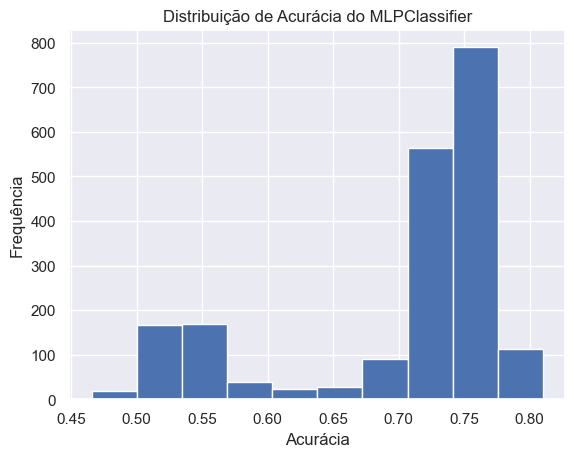

In [18]:
#média e desvio padrão
print("Média: {:.2f}%". format(np.mean(acuracias)*100))
print("Desvio padrão: {:.2f}%".format(np.std(acuracias)*100))

#plota o gráfico
plt.hist(acuracias, bins = 10)
plt.xlabel('Acurácia')
plt.ylabel('Frequência')
plt.title('Distribuição de Acurácia do MLPClassifier')
plt.show()

Média: 70.11%
Desvio padrão: 8.58%


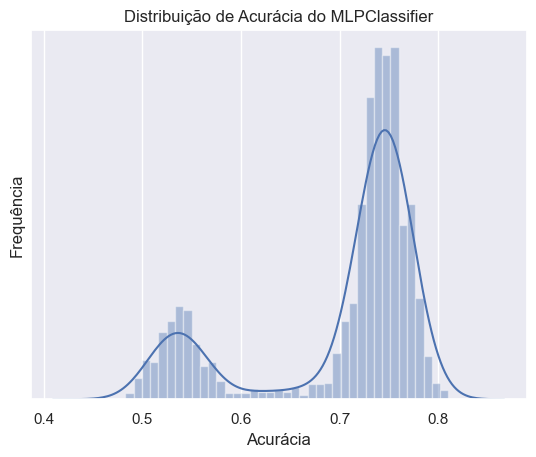

In [16]:
#média e desvio padrão
print("Média: {:.2f}%". format(np.mean(acuracias)*100))
print("Desvio padrão: {:.2f}%".format(np.std(acuracias)*100))

#remove warnings
warnings.filterwarnings("ignore")

#plota o gráfico
sns.distplot(acuracias)
plt.xlabel('Acurácia')
plt.ylabel('Frequência')
plt.yticks([])
plt.title("Distribuição de Acurácia do MLPClassifier")
plt.show()

<Axes: xlabel='alcohol', ylabel='sulphates'>

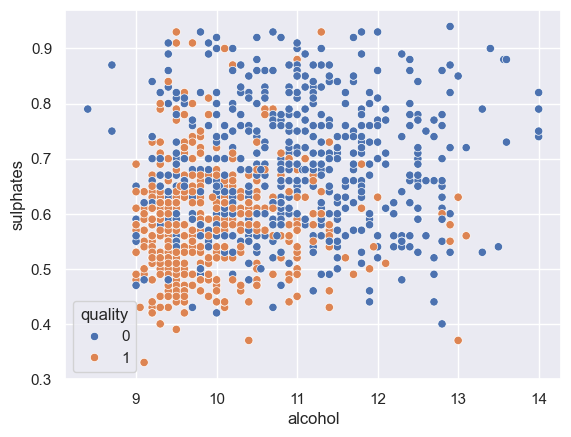

In [17]:
#não é possível separar os dados a olho nu
sns.scatterplot(x=df['alcohol'], y=df['sulphates'], hue='quality', data=df)

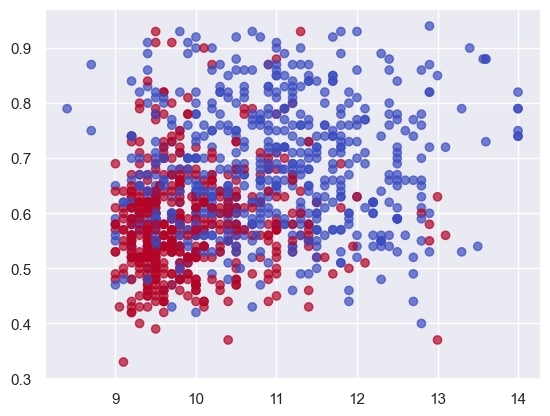

In [19]:
#não é possível separar os dados a olho nu
plt.scatter(df['alcohol'], df['sulphates'], c=df['quality'], cmap='coolwarm', alpha=0.7)

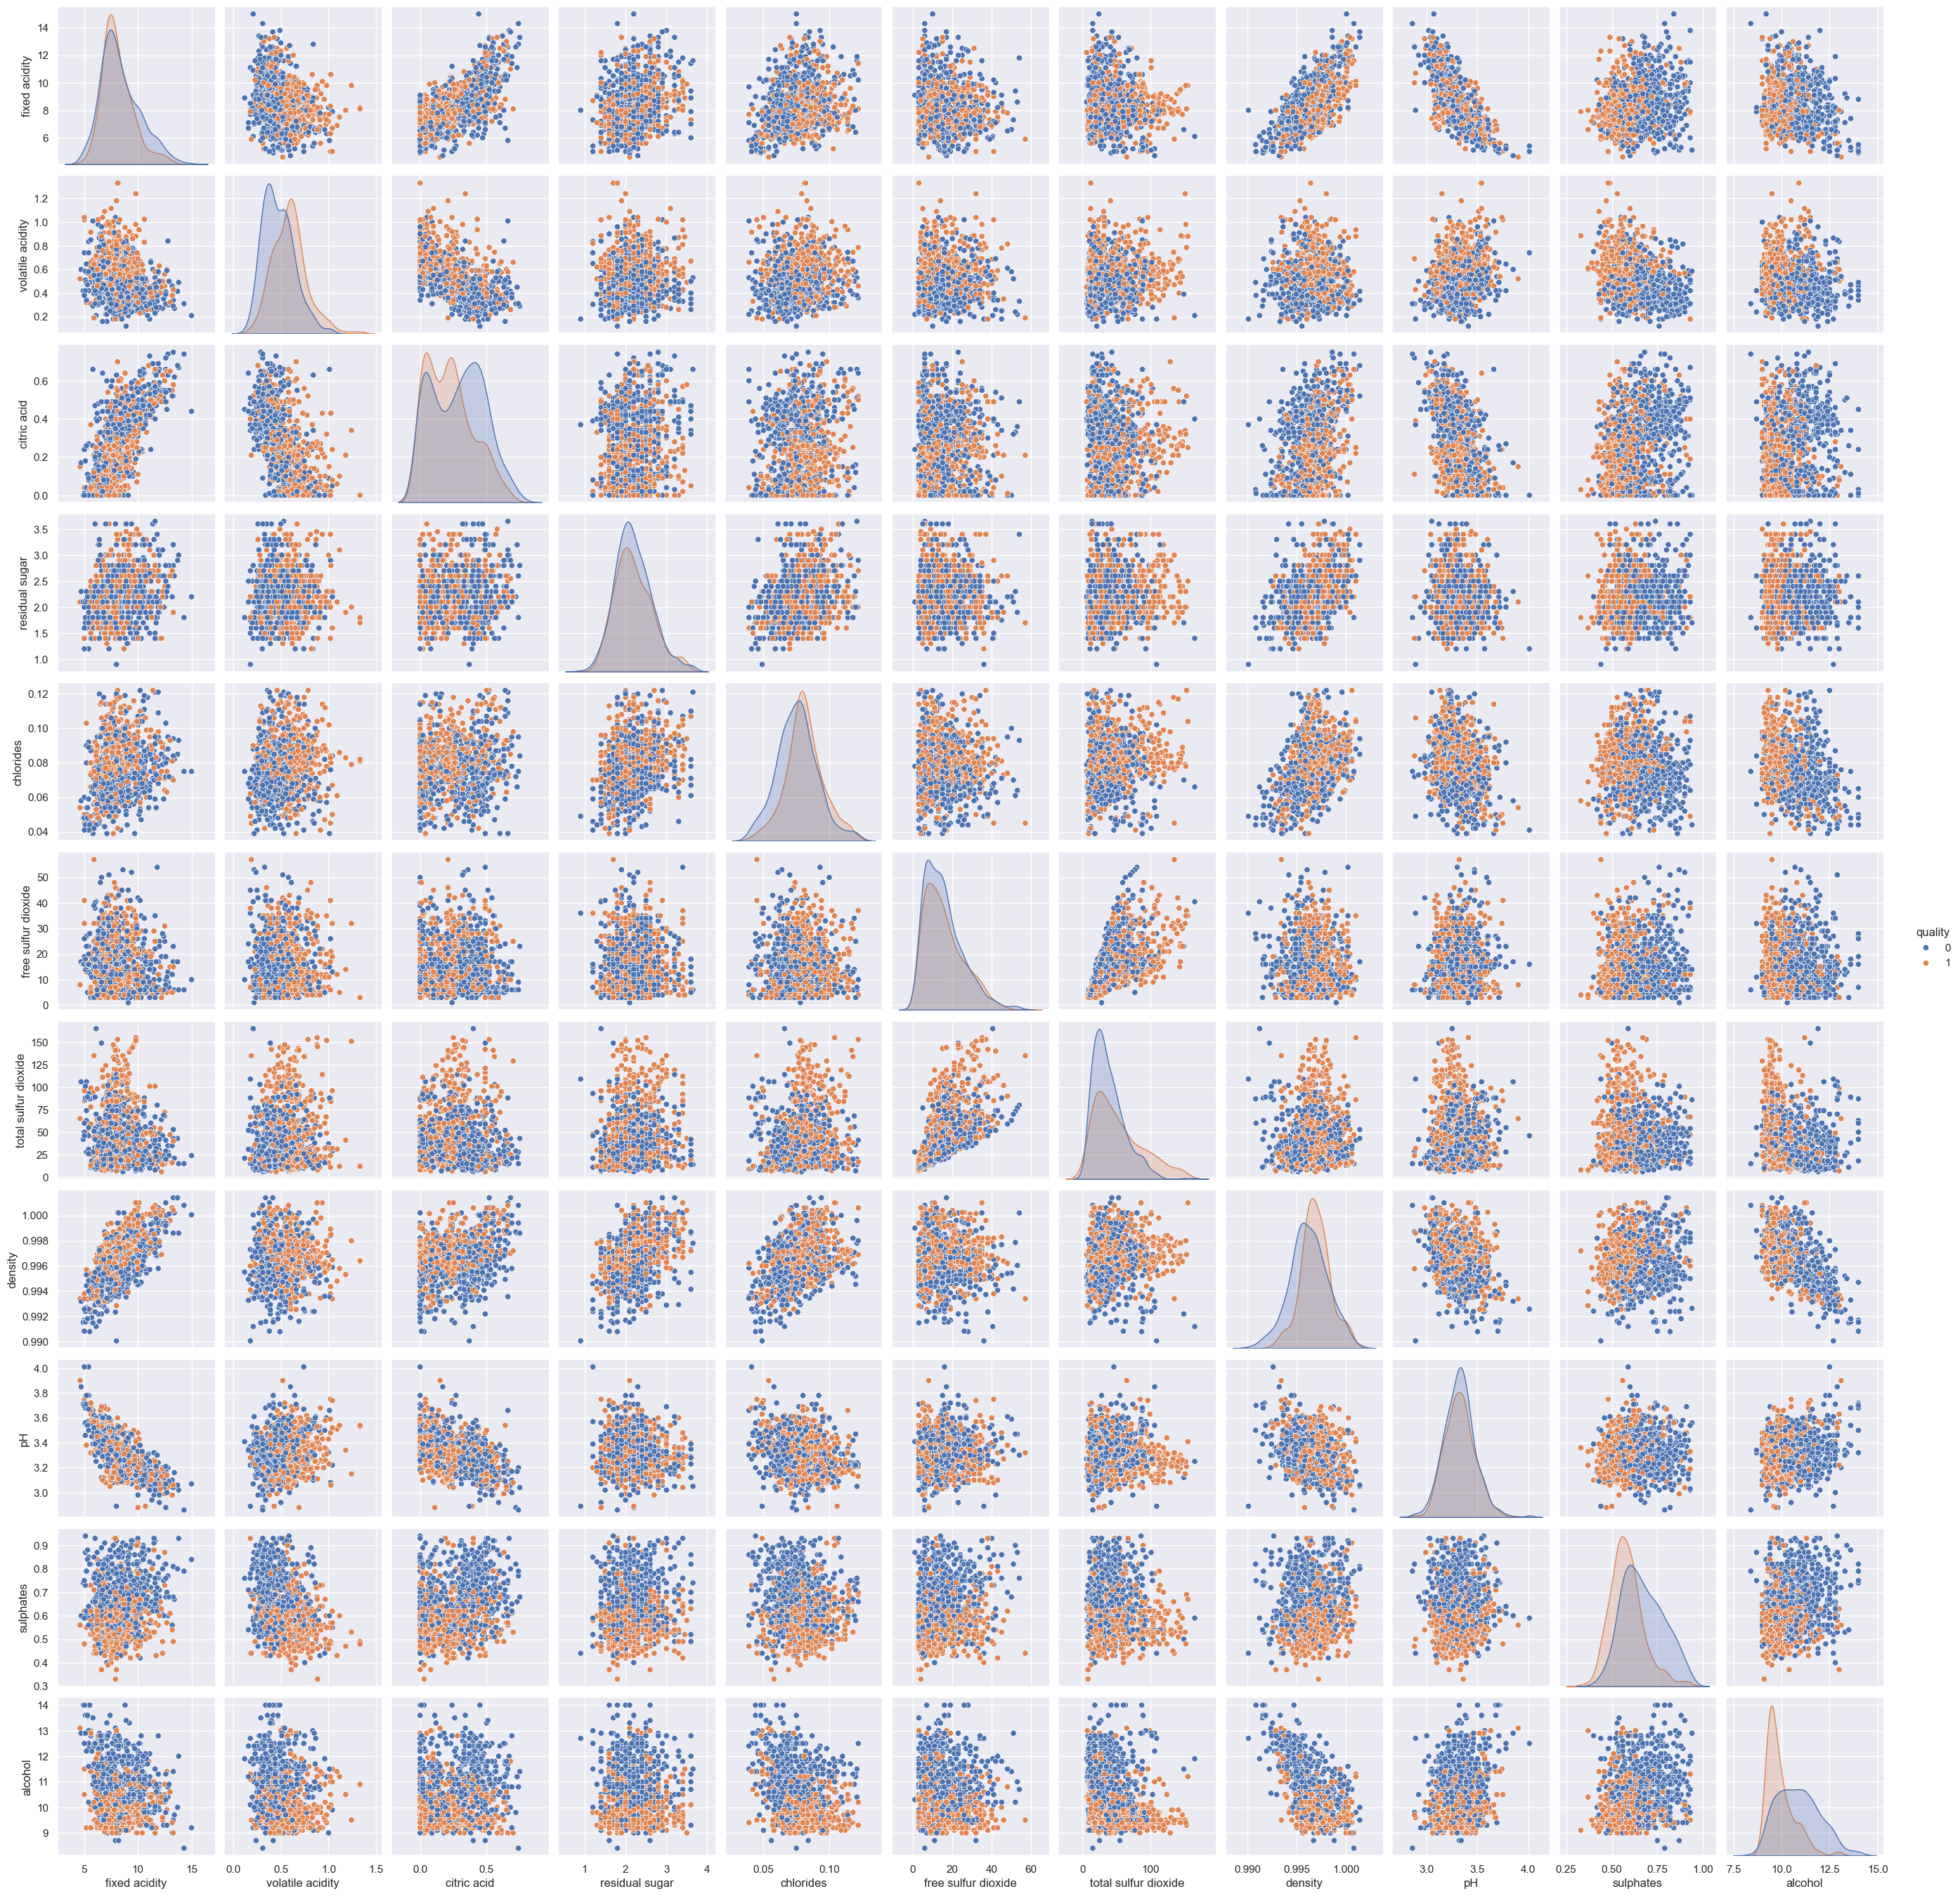

In [20]:
#não é possível separar os dados a olho nu
sns.pairplot(df, hue='quality')
plt.show()